# 로지스틱 회귀를 이용한 감성 분석

다음은 shap을 사용하여 선형 로지스틱 회귀 감성 분석 모델을 설명하는 간단한 예입니다. 선형 모델에서 예측 $f(x)$에 대한 특징 i의 SHAP 값(특징 독립성 가정)은 $\phi_i = \beta_i \cdot (x_i - E[x_i])$에 불과하다는 점에 유의하세요. 로지스틱 회귀 모델을 설명하기 때문에 SHAP 값의 단위는 로그 오드 공간에 있습니다.

우리가 사용하는 데이터 세트는 [이 논문](http://www.aclweb.org/anthology/P11-1015)의 고전적인 IMDB 데이터 세트입니다. 모델을 설명할 때 텍스트에 없는 단어가 때로는 존재하는 단어만큼 중요하다는 점이 흥미롭습니다.

In [1]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

## IMDB 데이터 세트 로드

In [3]:
corpus,y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train).toarray() # sparse also works but Explanation slicing is not yet supported
X_test = vectorizer.transform(corpus_test).toarray()

## 선형 로지스틱 회귀 모델 맞추기

In [4]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

## 선형 모델 설명하기

In [5]:
explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names())
shap_values = explainer(X_test)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


### 모든 기능의 효과 요약

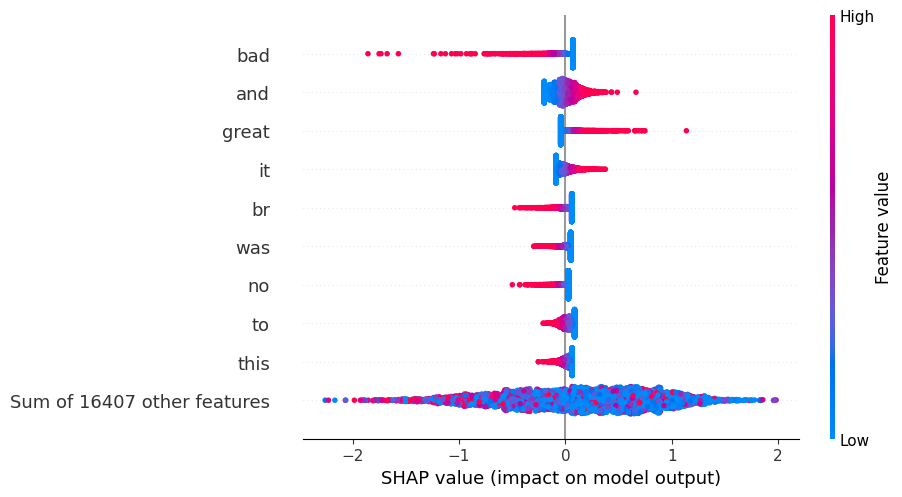

In [8]:
shap.plots.beeswarm(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())

### 첫 번째 리뷰의 감정 예측 설명하기

수치가 높을수록 부정적일 가능성이 높으므로 아래 그래프에서 '빨간색' 기능은 실제로 긍정적인 리뷰의 확률을 높이는 데 도움이 되고, 부정적인 기능은 확률을 낮추는 데 도움이 됩니다. 텍스트에 없는 것(예: 아래의  bad=0)이 텍스트에 있는 것만큼이나 중요한 역할을 하는 경우가 많다는 점이 흥미롭습니다. 특징의 값은 TF-IDF 값이라는 점을 기억하세요.

In [9]:
ind = 0
shap.plots.force(shap_values[ind])

In [10]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
"Twelve Monkeys" is odd and disturbing, yet being so clever and intelligent at the same time. It cleverly jumps between future and the past, and the story it tells is about a man named James Cole, a convict, who is sent back to the past to gather information about a man-made virus that wiped out 5 billion of the human population on the planet back in 1996. At first Cole is sent back to the year 1990 by accident and by misfortune he is taken to a mental institution where he tries to explain his purpose and where he meets a psychiatrist Dr. Kathryn Railly who tries to help him and a patient named Jeffrey Goines, the insane son of a famous scientist. Being provocative and somehow so sensible, dealing with and between reason and madness, the movie is a definite masterpiece in the history of science-fiction films.<br /><br />The story is just fantastic. It's so original and so entertaining. The screenplay itself written by David and Janet Peoples is inspired by a movie name

### Explain the second review's sentiment prediction

In [11]:
ind = 1
shap.plots.force(shap_values[ind])

In [12]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Negative Review:
I don't understand the positive comments made about this film. It is cheap and nasty on all levels and I cannot understand how it ever got made.<br /><br />Cartoon characters abound - Sue's foul-mouthed, alcoholic, layabout, Irish father being a prime example. None of the characters are remotely sympathetic - except, briefly, for Sue's Asian boyfriend but even he then turns out to be capable of domestic violence! As desperately unattractive as they both are, I've no idea why either Rita and/or Sue would throw themselves at a consummate creep like Bob - but given that they do, why should I be expected to care what happens to them? So many reviews keep carping on about how "realistic" it is. If that is true, it is a sad reflection on society but no reason to put it on film.<br /><br />I didn't like the film at all.



### 세 번째 리뷰의 감정 예측에 대해 설명하세요.

In [15]:
ind = 2
shap.plots.force(shap_values[ind])

In [16]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
I finally saw this film tonight after renting it at Blockbuster (VHS). I have to agree that it is wildly original. Yes, maybe the characters were not fully realized but it isn't one of those movies. Rather, we are treated to the director's eye, his vision of what the story is about. And it does not stop. And to be honest, I didn't want it to. I do believe that Sabu had to have influenced the director's of 'Lock, Stock & Two Smoking Barrels' and 'Run, Lola, Run'. But I absolutely loved the way the three leads SEE the beautiful woman on the street to distract them momentarily. I really need to see this director's other work because this film really intrigued me. If you want insight, culture, sturm und drang, go somewhere else. If you want a laugh, camera movement and criminal hilarity, look here.

